# IITM - MLP - Week 3 + 4 (Linear and Polynomial Regression with Data exploration and Hyperparameter Tunning)

## Imports

In [2]:
# ---------- Common ------------
import os
import time
import json
import random
import ast
from datetime import datetime
from collections import Counter

# ---------- Data Manipulation ------------
import pandas as pd
import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# ---------- Sklearn ------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import permutation_test_score

from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# ---------- Sklearn ML Models ------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor

# ---------- Sklearn Metrics ------------
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# ---------- Sklearn Abstract ------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.decomposition import PCA

from sklearn.feature_extraction import DictVectorizer

from sklearn import set_config

# ---------- Sklearn: Filter based ------------
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

# ---------- Sklearn: Wrapper based ------------
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

# ---------- Sklearn Datasets ------------
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

# ---------- Sklearn External Datasets ------------
from sklearn.datasets import fetch_openml

# ---------- Imblearn ------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# ---------- Scipy ------------
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import loguniform
from scipy.stats import uniform

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

import tempfile

## Presets

In [89]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

np.random.seed(306)

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

set_config(display='diagram')


cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

## Common helper functions

In [8]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std Dev: {scores.std()}')
    return

def multiple_scores(y_true, y_pred):
    Functions = [explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score]
    Names = ("Explained variance score : ", "Max Error : ", "Mean Absolute Error :", "Mean Squared Error: ", "R squared score: ")
    for func,name in zip(Functions, Names):
        print(name, func(y_true, y_pred))
        
        
class uniform_int:
    """ Integer output of uniform disribution """
    def __init__(self):
        self._distribution = uniform(a,b)
    
    def rvs(self, *args, **kwargs):
        return self._distribution.rvs(*args, **kwargs).astype(int)

## Load Data: California housing

In [90]:
df = fetch_california_housing(as_frame=True).frame
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
print(f"Shape: {df.shape}")

Shape: (20640, 9)


In [91]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [92]:
X_train_com, X_test, y_train_com, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # shuffle True by default
X_train, X_val, y_train, y_val = train_test_split(X_train_com, y_train_com, test_size=0.25, random_state=42) 

# Now we have:
#    X    |     y
# -----------------
# X_train     y_train
# X_val       y_val
# X_test      y_test

print("Shape:\n\t X \t\t|\t y")
print(f"X_train: {X_train.shape} \t  y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape} \t  y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape} \t  y_test:  {y_test.shape}")
print(f"\nX_train_com: {X_train_com.shape} \t  y_train_com: {y_train_com.shape}")

Shape:
	 X 		|	 y
X_train: (11610, 8) 	  y_train: (11610,)
X_val:   (3870, 8) 	  y_val:   (3870,)
X_test:  (5160, 8) 	  y_test:  (5160,)

X_train_com: (15480, 8) 	  y_train_com: (15480,)


# Data Exploration

## Shape

In [107]:
print(f"Shape whole: {df.shape}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

Shape whole: (20640, 9)
Shape X: (20640, 8)
Shape y: (20640,)


## Features

In [108]:
print(f"Features: {list(X.columns)}")

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Samples

In [35]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [36]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

## Statistics

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [39]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Histogram

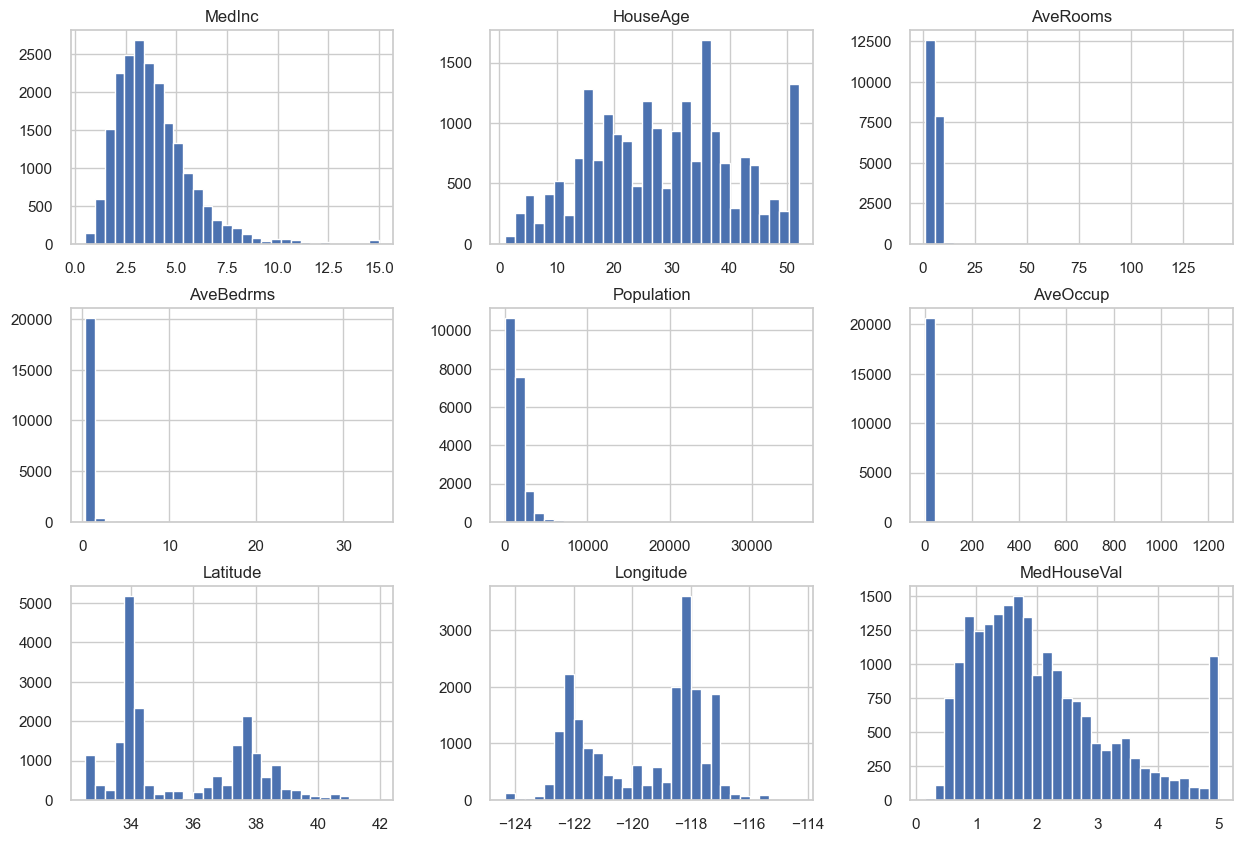

In [40]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

## PairPlot

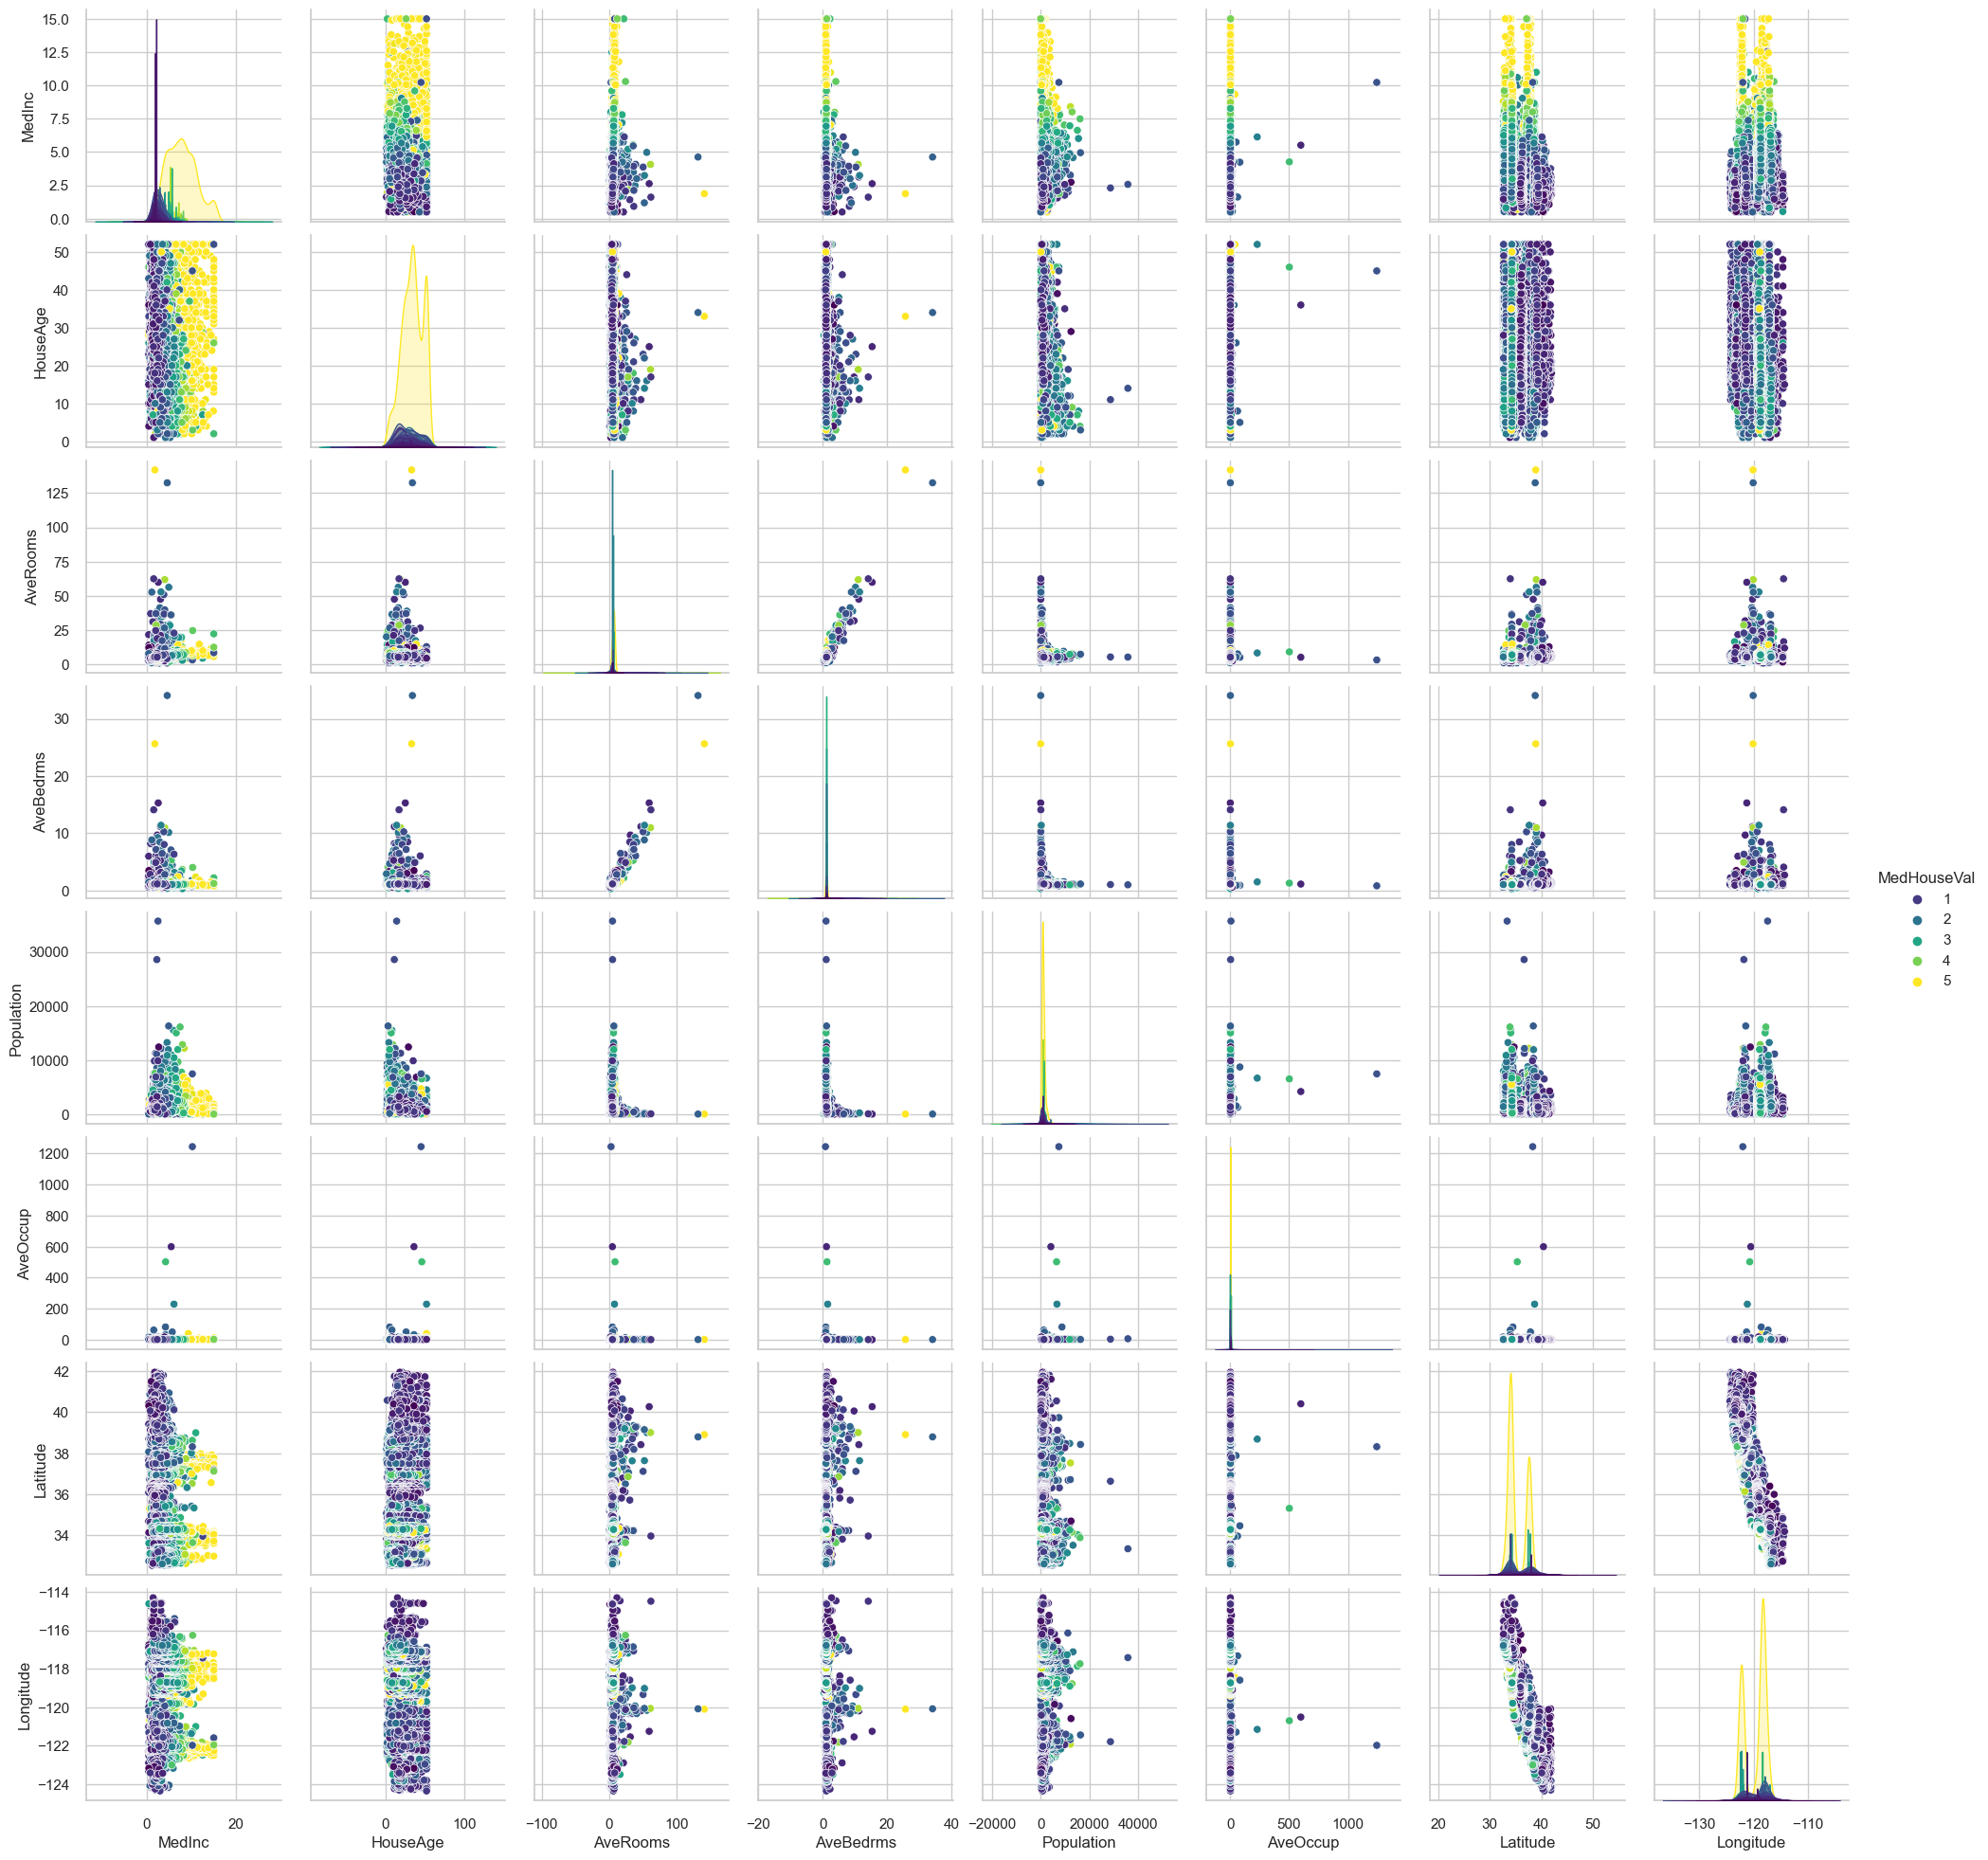

In [41]:
# sns.pairplot(data=df, hue='MedHouseVal', palette='viridis')
# plt.show()

# Linear Regression (Week 3)

## Load Data: California housing

In [93]:
df = fetch_california_housing(as_frame=True).frame
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
print(f"Shape: {df.shape}")

Shape: (20640, 9)


In [94]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


## Preprocessing (done above)

## Preprocessing

In [96]:
X_train_com, X_test, y_train_com, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # shuffle True by default
X_train, X_val, y_train, y_val = train_test_split(X_train_com, y_train_com, test_size=0.25, random_state=42) 

# Now we have:
#    X    |     y
# -----------------
# X_train     y_train
# X_val       y_val
# X_test      y_test

print("Shape:\n\t X \t\t|\t y")
print(f"X_train: {X_train.shape} \t  y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape} \t  y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape} \t  y_test:  {y_test.shape}")
print(f"\nX_train_com: {X_train_com.shape} \t  y_train_com: {y_train_com.shape}")

Shape:
	 X 		|	 y
X_train: (11610, 8) 	  y_train: (11610,)
X_val:   (3870, 8) 	  y_val:   (3870,)
X_test:  (5160, 8) 	  y_test:  (5160,)

X_train_com: (15480, 8) 	  y_train_com: (15480,)


## Modeling

### Lin Reg

In [97]:
lin_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())])

lin_reg_pipeline.fit(X_train_com, y_train_com)

print(f"Intercept: {lin_reg_pipeline[-1].intercept_}")
print(f"Weights: {lin_reg_pipeline[-1].coef_}")

Intercept: 2.0703489205426377
Weights: [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


In [98]:
lin_reg_pipeline[-1]

LinearRegression()

### Model evaluation

#### Score

In [99]:
print(f"Train set score: {lin_reg_pipeline.score(X_train_com, y_train_com)}")
print(f"Test set score: {lin_reg_pipeline.score(X_test, y_test)}")

Train set score: 0.609873031052925
Test set score: 0.5910509795491352


In [100]:
# best score is 1
# scores uses r2 score method

In [105]:
print(f"Test set Mean squared error: {mean_squared_error(y_test, lin_reg_pipeline.predict(X_test))}")

Test set Mean squared error: 0.5411287478470688


#### Cross_val_score

In [104]:
lin_reg_score = cross_val_score(lin_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_squared_error')

# here negative scored obtained
# multiply it with -1 to get error
print(f"Mean Squared error of linear reg on test set: {round(-1*lin_reg_score.mean(), 3)} +/- {round(lin_reg_score.std(), 3)}")

Mean Squared error of linear reg on test set: 0.529 +/- 0.022


In [106]:
# with cross validation error on test set is reduced from 0.54 to 0.529

In [107]:
lin_reg_score # scores on each split, total split = 10

array([-0.50009976, -0.52183352, -0.55931218, -0.52110499, -0.56059203,
       -0.50510767, -0.52386194, -0.54775518, -0.5007161 , -0.54713448])

#### Cross_validate

In [109]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_squared_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
lin_reg_train_error = -1 * lin_reg_cv_results["train_score"]
lin_reg_test_error = -1 * lin_reg_cv_results["test_score"]

print(f"Mean Squared error of linear reg on train set: {round(lin_reg_train_error.mean(), 3)} +/- {round(lin_reg_train_error.std(), 3)}")
print(f"Mean Squared error of linear reg on valid set: {round(lin_reg_test_error.mean(), 3)} +/- {round(lin_reg_test_error.std(), 3)}")

Mean Squared error of linear reg on train set: 0.519 +/- 0.006
Mean Squared error of linear reg on valid set: 0.529 +/- 0.022


In [110]:
# Cross_validate same as cross_val_score but with extra features like return estimator, fit time, score time, train score, test score

In [111]:
lin_reg_cv_results

{'fit_time': array([0.01400256, 0.01200247, 0.01400852, 0.01100874, 0.01400661,
        0.01200032, 0.01000619, 0.01300383, 0.01200032, 0.01300359]),
 'score_time': array([0.00199866, 0.00399733, 0.00300431, 0.00198388, 0.00398898,
        0.003021  , 0.00299525, 0.00299644, 0.0049994 , 0.00299549]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

In [116]:
def plot_learning_curve(train_sizes, train_scores, test_scores, fit_times):
    
    train_score_mean = np.mean(-train_scores, axis=1)
    train_score_std = np.std(-train_scores, axis=1)
    test_score_mean = np.mean(-test_scores, axis=1)
    test_score_std = np.std(-test_scores, axis=1)
    fit_time_mean = np.mean(fit_times, axis=1)
    fit_time_std = np.std(fit_times, axis=1)
    
    plt.fill_between(train_sizes, train_score_mean-train_score_std, train_score_mean+train_score_std, alpha=0.3, color='r')
    plt.fill_between(train_sizes, test_score_mean-test_score_std, test_score_mean+test_score_std, alpha=0.3, color='g')
    plt.plot(train_sizes, train_score_mean, "o-", color='r', label="Training score")
    plt.plot(train_sizes, test_score_mean, "o-", color='g', label="CV score")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.show()

In [113]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(lin_reg_pipeline, 
                                                                                X_train_com, 
                                                                                y_train_com, 
                                                                                cv=cv,
                                                                                scoring='neg_mean_squared_error',
                                                                                n_jobs=-1,
                                                                                return_times=True,
                                                                                train_sizes=np.linspace(0.2,1.0,10)) # 10 values in range 0.2 to 1.0

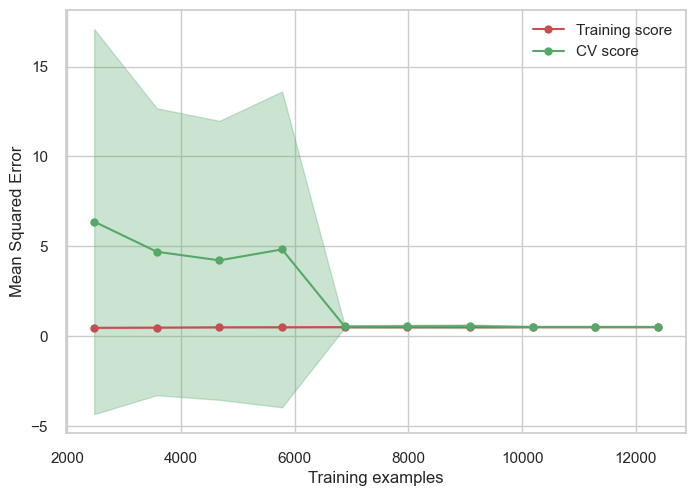

In [117]:
plot_learning_curve(train_sizes, train_scores, test_scores, fit_times)

In [118]:
# Above 7000 examples, train error and cv error reduced and almost coinciding which is good
# Less examples means overfitting, thats why validation error are too high.

#### Model examination

In [120]:
feature_names = X_train_com.columns
print(feature_names)

coefs = [est[-1].coef_ for est in lin_reg_cv_results["estimator"]]
weights_lin_reg = pd.DataFrame(coefs, columns=feature_names)
print(f"\nShape: {weights_poly_reg.shape}")
weights_lin_reg.head(2)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Shape: (10, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.844325,0.118464,-0.304620,0.356621,0.000174,-0.042396,-0.896046,-0.868906
1,0.858714,0.122587,-0.318971,0.367952,-0.005787,-0.047584,-0.881884,-0.860932


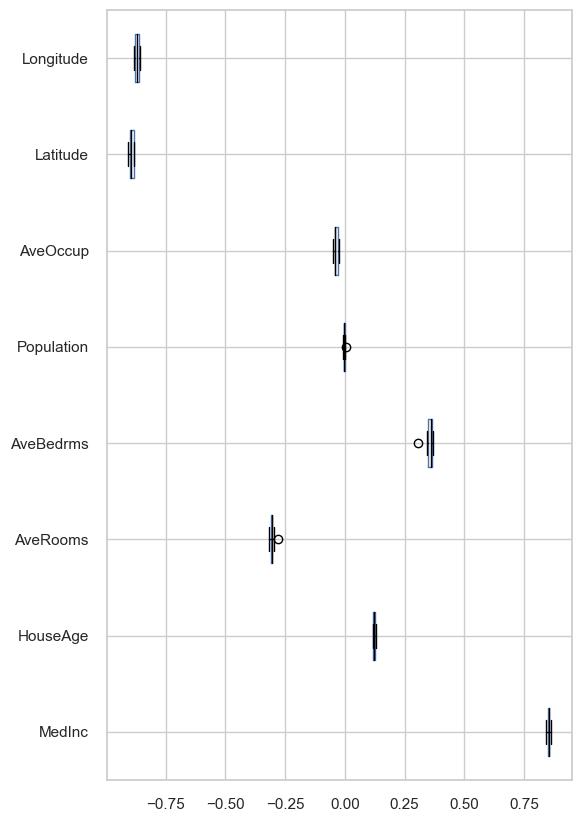

In [122]:
color = {"whiskers":"black", "medians":"black", "caps":"black"}
weights_lin_reg.plot.box(color=color, vert=False, figsize=(6, 10))
plt.show()

In [123]:
weights_lin_reg.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,10.0,0.852153,0.005763,0.843517,0.848871,0.852711,0.854743,0.861659
HouseAge,10.0,0.122770,0.004312,0.117394,0.119895,0.121592,0.125520,0.130560
AveRooms,10.0,-0.304384,0.010998,-0.318971,-0.310778,-0.305795,-0.302980,-0.278426
AveBedrms,10.0,0.353528,0.018044,0.307474,0.349715,0.360139,0.364646,0.367952
Population,10.0,-0.001576,0.003254,-0.005787,-0.002688,-0.002063,-0.000350,0.005297
AveOccup,10.0,-0.037059,0.008582,-0.047584,-0.042486,-0.042325,-0.027562,-0.026331
Latitude,10.0,-0.894011,0.009975,-0.908058,-0.901411,-0.895370,-0.883967,-0.881884
Longitude,10.0,-0.869753,0.009097,-0.884206,-0.876542,-0.869631,-0.862110,-0.857844


#### Select Best Model

In [139]:
best_model_index = np.argmin(lin_reg_test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

print(f"Intercept: {selected_model['lin_reg'].intercept_}")
print(f"Weights: {selected_model['lin_reg'].coef_}")

Intercept: 2.0779898917958657
Weights: [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


#### Model Performance on train set

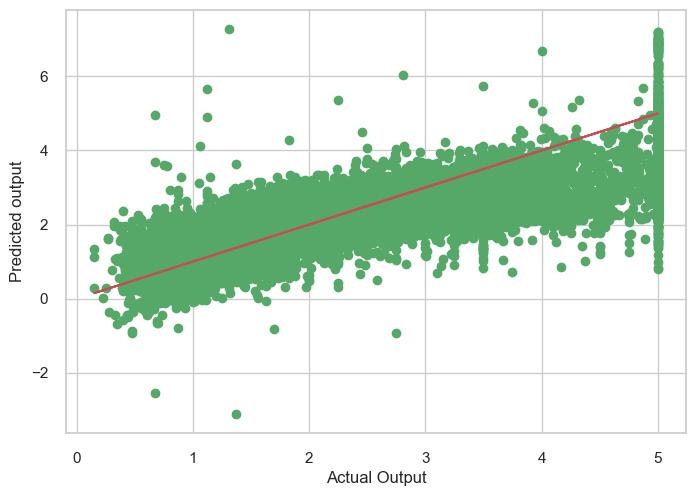

In [141]:
cv_pred = cross_val_predict(lin_reg_pipeline, X_train_com, y_train_com)

mse_cv = mean_squared_error(y_train_com, cv_pred)

plt.scatter(y_train_com, cv_pred, color="g")
plt.plot(y_train_com, y_train_com, 'r-')
plt.xlabel("Actual Output")
plt.ylabel("Predicted output")
plt.show()

In [142]:
print(f"MSE cv: {mse_cv}")

MSE cv: 0.5242394295977021


#### Model Predictions

In [145]:
y_pred = lin_reg_pipeline.predict(X_test)
print(f"Pred without cv: {y_pred[:5]}")

y_pred_cv = selected_model.predict(X_test)
print(f"Pred with cv: {y_pred_cv[:5]}")

Pred without cv: [0.72412832 1.76677807 2.71151581 2.83601179 2.603755  ]
Pred with cv: [0.73548515 1.7725621  2.70011199 2.83716602 2.60743151]


#### Model Performance on test set

In [146]:
score = lin_reg_pipeline.score(X_test, y_test)
print(f"Score without cv: {score}")

score_cv = selected_model.score(X_test, y_test)
print(f"Score with cv: {score_cv}")

Score without cv: 0.5910509795491352
Score with cv: 0.5923577635319088


# Baseline Model

# Regression (Week 4)

## Load Data

In [68]:
df = fetch_california_housing(as_frame=True).frame
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
print(f"Shape: {df.shape}")

Shape: (20640, 9)


In [69]:
X_train_com, X_test, y_train_com, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # shuffle True by default
X_train, X_val, y_train, y_val = train_test_split(X_train_com, y_train_com, test_size=0.25, random_state=42) 

# Now we have:
#    X    |     y
# -----------------
# X_train     y_train
# X_val       y_val
# X_test      y_test

print("Shape:\n\t X \t\t|\t y")
print(f"X_train: {X_train.shape} \t  y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape} \t  y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape} \t  y_test:  {y_test.shape}")
print(f"\nX_train_com: {X_train_com.shape} \t  y_train_com: {y_train_com.shape}")

Shape:
	 X 		|	 y
X_train: (11610, 8) 	  y_train: (11610,)
X_val:   (3870, 8) 	  y_val:   (3870,)
X_test:  (5160, 8) 	  y_test:  (5160,)

X_train_com: (15480, 8) 	  y_train_com: (15480,)


## Linear Regression with Normal Eq

In [70]:
lin_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())])

lin_reg_cv_results = cross_validate(lin_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
lin_reg_train_error = -1 * lin_reg_cv_results["train_score"]
lin_reg_test_error = -1 * lin_reg_cv_results["test_score"]

print(f"Mean Absolute error of linear reg on train set: {round(lin_reg_train_error.mean(), 3)} +/- {round(lin_reg_train_error.std(), 3)}")
print(f"Mean Absolute error of linear reg on valid set: {round(lin_reg_test_error.mean(), 3)} +/- {round(lin_reg_test_error.std(), 3)}")

Mean Absolute error of linear reg on train set: 0.53 +/- 0.002
Mean Absolute error of linear reg on valid set: 0.527 +/- 0.008


In [71]:
# Both errors are close but high means underfitting.
# By polynomial regression, more features can be added to overcome underfitting

## Linear Regression with SGD

In [28]:
sgd_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("sgd_reg", SGDRegressor(max_iter=np.ceil(1e6/X_train_com.shape[0]),
                                                     early_stopping=True,
                                                     eta0=1e-4,
                                                     learning_rate='constant',
                                                     tol=1e-5,
                                                     validation_fraction=0.1,
                                                     n_iter_no_change=5,
                                                     average=10,
                                                     random_state=42))])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
sgd_reg_train_error = -1 * sgd_reg_cv_results["train_score"]
sgd_reg_test_error = -1 * sgd_reg_cv_results["test_score"]

print(f"Mean Absolute error of SGD reg on train set: {round(sgd_reg_train_error.mean(), 3)} +/- {round(sgd_reg_train_error.std(), 3)}")
print(f"Mean Absolute error of SGD reg on valid set: {round(sgd_reg_test_error.mean(), 3)} +/- {round(sgd_reg_test_error.std(), 3)}")

Mean Absolute error of SGD reg on train set: 0.564 +/- 0.023
Mean Absolute error of SGD reg on valid set: 0.561 +/- 0.025


## Polynomial Regression

### General Poly reg

In [29]:
poly_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lin_reg", LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
poly_reg_train_error = -1 * poly_reg_cv_results["train_score"]
poly_reg_test_error = -1 * poly_reg_cv_results["test_score"]

print(f"Mean Absolute error of Poly reg on train set: {round(poly_reg_train_error.mean(), 3)} +/- {round(poly_reg_train_error.std(), 3)}")
print(f"Mean Absolute error of Poly reg on valid set: {round(poly_reg_test_error.mean(), 3)} +/- {round(poly_reg_test_error.std(), 3)}")

Mean Absolute error of Poly reg on train set: 0.461 +/- 0.003
Mean Absolute error of Poly reg on valid set: 0.485 +/- 0.03


In [30]:
# Error has decreased from 0.56 to 0.46 on train data

### Poly reg with interaction_only=True

In [31]:
# polynomial reg with interaction_only=True
# higher order feat are neglected

poly_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only=True)),
                              ("feature_scaling", StandardScaler()),
                              ("lin_reg", LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
poly_reg_train_error = -1 * poly_reg_cv_results["train_score"]
poly_reg_test_error = -1 * poly_reg_cv_results["test_score"]

print(f"Mean Absolute error of Poly reg on train set: {round(poly_reg_train_error.mean(), 3)} +/- {round(poly_reg_train_error.std(), 3)}")
print(f"Mean Absolute error of Poly reg on valid set: {round(poly_reg_test_error.mean(), 3)} +/- {round(poly_reg_test_error.std(), 3)}")

Mean Absolute error of Poly reg on train set: 0.478 +/- 0.003
Mean Absolute error of Poly reg on valid set: 0.497 +/- 0.024


### Poly reg : different degrees

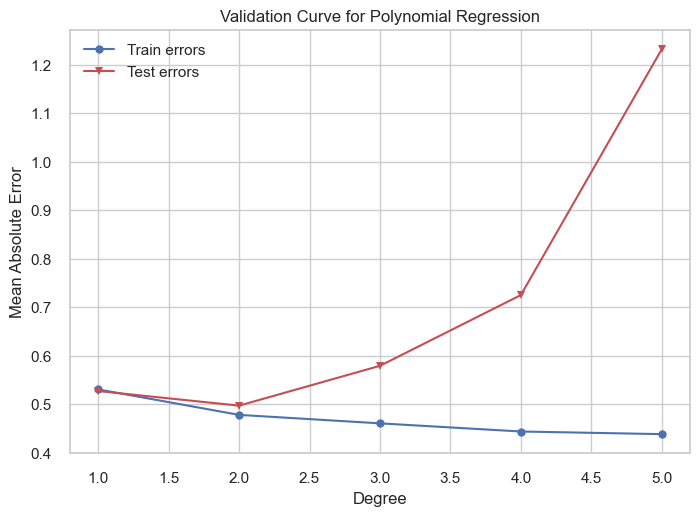

In [32]:
degree = [1,2,3,4,5]

train_score, test_scores = validation_curve(poly_reg_pipeline,
                                           X_train_com,
                                           y_train_com,
                                           param_name="poly__degree",
                                           param_range=degree,
                                           cv=cv,
                                           scoring="neg_mean_absolute_error",
                                           n_jobs=2)

train_errors, test_errors = -train_score, -test_scores

plt.plot(degree, train_errors.mean(axis=1), 'b-o', label="Train errors")
plt.plot(degree, test_errors.mean(axis=1), 'r-v', label="Test errors")
plt.xlabel("Degree")
plt.ylabel("Mean Absolute Error")
plt.title("Validation Curve for Polynomial Regression")
plt.legend()
plt.show()

In [33]:
# Degree 2 is best choice

## Ridge Regression

### General

In [48]:
# Polynomial model may overfit due to flexibility of model
# Use regularization to reduce model capabilities

ridge_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge_reg", Ridge(alpha=0.5))])
# alpha: regularization rate

ridge_reg_cv_results = cross_validate(ridge_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
ridge_reg_train_error = -1 * ridge_reg_cv_results["train_score"]
ridge_reg_test_error = -1 * ridge_reg_cv_results["test_score"]

print(f"Mean Absolute error of Ridge reg on train set: {round(ridge_reg_train_error.mean(), 3)} +/- {round(ridge_reg_train_error.std(), 3)}")
print(f"Mean Absolute error of Ridge reg on valid set: {round(ridge_reg_test_error.mean(), 3)} +/- {round(ridge_reg_test_error.std(), 3)}")

Mean Absolute error of Ridge reg on train set: 0.481 +/- 0.003
Mean Absolute error of Ridge reg on valid set: 0.487 +/- 0.006


### Ridge: Hyperparameter Tuning

#### With RidgeCV

In [35]:
alpha_list = np.logspace(-4, 0, num=20)

ridge_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge_cv", RidgeCV(alphas=alpha_list,
                                                  cv=cv,
                                                  scoring='neg_mean_absolute_error'))])
# alpha: regularization rate

ridge_reg_cv_results = ridge_reg_pipeline.fit(X_train_com, y_train_com)

print(f"Error with best alpha: {-1*ridge_reg_cv_results[-1].best_score_}")
print(f"Value of best alpha: {ridge_reg_cv_results[-1].alpha_}")

Error with best alpha: 0.47294070100901064
Value of best alpha: 0.007847599703514606


In [36]:
# Error reduced from 0.55 to 0.47

#### With GridSearchCV

In [37]:
alpha_list = np.logspace(-4, 0, num=20)
degrees = [1, 2, 3]

ridge_reg_pipeline = Pipeline([('poly', PolynomialFeatures()),
                              ("feature_scaling", StandardScaler()),
                              ("ridge", Ridge())])

param_grid = {"poly__degree":degrees,
             "ridge__alpha":alpha_list}

ridge_reg_grid_search = GridSearchCV(ridge_reg_pipeline, 
                                     param_grid=param_grid,
                                     n_jobs=2, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True)

ridge_reg_grid_search.fit(X_train_com, y_train_com)

# Best parameter index
best_param_ind = ridge_reg_grid_search.best_index_

mean_train_error = -1* ridge_reg_grid_search.cv_results_['mean_train_score'][best_param_ind]
mean_test_error = -1* ridge_reg_grid_search.cv_results_['mean_test_score'][best_param_ind]
std_train_error = ridge_reg_grid_search.cv_results_['std_train_score'][best_param_ind]
std_test_error = ridge_reg_grid_search.cv_results_['std_test_score'][best_param_ind]

print(f"Best Mean Absolute error of Ridge Poly reg on train set: {round(mean_train_error.mean(), 3)} +/- {round(std_train_error.std(), 3)}")
print(f"Best Mean Absolute error of Ridge poly reg on valid set: {round(mean_test_error.mean(), 3)} +/- {round(std_test_error.std(), 3)}")

print(f"Error with best estimator: {-1*ridge_reg_grid_search.best_score_}")
print(f"Value of best params: {ridge_reg_grid_search.best_params_}")

Best Mean Absolute error of Ridge Poly reg on train set: 0.463 +/- 0.0
Best Mean Absolute error of Ridge poly reg on valid set: 0.474 +/- 0.0
Error with best estimator: 0.4738651177000638
Value of best params: {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


## Lasso Regression

### General

In [38]:
# More aggresive regularization
# returns sparse matrix 
# least imp feat has 0 weight
# Can be used for feature selection

lasso_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lasso_reg", Lasso(alpha=0.01))])
# alpha: regularization rate

lasso_reg_cv_results = cross_validate(lasso_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
lasso_reg_train_error = -1 * lasso_reg_cv_results["train_score"]
lasso_reg_test_error = -1 * lasso_reg_cv_results["test_score"]

print(f"Mean Absolute error of Ridge reg on train set: {round(lasso_reg_train_error.mean(), 3)} +/- {round(lasso_reg_train_error.std(), 3)}")
print(f"Mean Absolute error of Ridge reg on valid set: {round(lasso_reg_test_error.mean(), 3)} +/- {round(lasso_reg_test_error.std(), 3)}")

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+01, tolerance: 1.654e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+01, tolerance: 1.669e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.849e+01, toleranc

Mean Absolute error of Ridge reg on train set: 0.529 +/- 0.003
Mean Absolute error of Ridge reg on valid set: 0.528 +/- 0.008


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+01, tolerance: 1.658e+00
  model = cd_fast.enet_coordinate_descent(


In [39]:
# Error is high compared to others and also the model did not converge
# Its a baseline model. Now find best params.

### Lasso: Hyperparameter Tuning

#### With GridSearchCV

In [6]:
alpha_list = np.logspace(-4, 0, num=20)
degrees = [1, 2, 3]

lasso_reg_pipeline = Pipeline([('poly', PolynomialFeatures()),
                              ("feature_scaling", StandardScaler()),
                              ("lasso", Lasso())])

param_grid = {"poly__degree":degrees,
             "lasso__alpha":alpha_list}

lasso_reg_grid_search = GridSearchCV(lasso_reg_pipeline, 
                                     param_grid=param_grid,
                                     n_jobs=2, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True)

lasso_reg_grid_search.fit(X_train_com, y_train_com)

# Best parameter index
best_param_ind = lasso_reg_grid_search.best_index_

mean_train_error = -1* lasso_reg_grid_search.cv_results_['mean_train_score'][best_param_ind]
mean_test_error = -1* lasso_reg_grid_search.cv_results_['mean_test_score'][best_param_ind]
std_train_error = lasso_reg_grid_search.cv_results_['std_train_score'][best_param_ind]
std_test_error = lasso_reg_grid_search.cv_results_['std_test_score'][best_param_ind]

print(f"Best Mean Absolute error of Lasso Poly reg on train set: {round(mean_train_error.mean(), 3)} +/- {round(std_train_error.std(), 3)}")
print(f"Best Mean Absolute error of Lasso poly reg on valid set: {round(mean_test_error.mean(), 3)} +/- {round(std_test_error.std(), 3)}")

print(f"Error with best estimator: {-1*lasso_reg_grid_search.best_score_}")
print(f"Value of best params: {lasso_reg_grid_search.best_params_}")

Best Mean Absolute error of Lasso Poly reg on train set: 0.462 +/- 0.0
Best Mean Absolute error of Lasso poly reg on valid set: 0.488 +/- 0.0
Error with best estimator: 0.487983044533914
Value of best params: {'lasso__alpha': 0.0001, 'poly__degree': 3}


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+03, tolerance: 2.066e+00
  model = cd_fast.enet_coordinate_descent(


## SGD with Polynomial Feat and Regularization

### General Poly reg with SGD

In [40]:
poly_reg_pipeline = Pipeline([('poly', PolynomialFeatures()),
                              ("feature_scaling", StandardScaler()),
                              ("sgd_reg", SGDRegressor(penalty="elasticnet",
                                                      random_state=42))])

poly_reg_sgd_cv_results = cross_validate(poly_reg_pipeline, 
                                    X_train_com, 
                                    y_train_com, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

# convert score to error
poly_reg_train_error = -1 * poly_reg_sgd_cv_results["train_score"]
poly_reg_test_error = -1 * poly_reg_sgd_cv_results["test_score"]

print(f"Mean Absolute error of Poly reg on train set: {round(poly_reg_train_error.mean(), 3)} +/- {round(poly_reg_train_error.std(), 3)}")
print(f"Mean Absolute error of Poly reg on valid set: {round(poly_reg_test_error.mean(), 3)} +/- {round(poly_reg_test_error.std(), 3)}")

Mean Absolute error of Poly reg on train set: 10824283052.546 +/- 4423288211.832
Mean Absolute error of Poly reg on valid set: 10946788540.25 +/- 5396536227.703


### SGD HPT: RandomizedSearchCV

In [41]:
poly_reg_pipeline = Pipeline([('poly', PolynomialFeatures()),
                              ("feature_scaling", StandardScaler()),
                              ("sgd_reg", SGDRegressor(penalty="elasticnet",
                                                      random_state=42))])

param_grid = {"poly__degree":[1, 2, 3],
             "sgd_reg__learning_rate":['constant', 'adaptive', 'invscaling'],
             "sgd_reg__l1_ratio":uniform(0, 1),
             "sgd_reg__eta0": loguniform(1e-5, 1),
             "sgd_reg__power_t":uniform(0, 1)}

poly_reg_random_search = RandomizedSearchCV(poly_reg_pipeline, 
                                     param_distributions=param_grid,
                                     n_iter=10, 
                                    cv=cv,
                                    scoring='neg_mean_absolute_error')

poly_reg_random_search.fit(X_train_com, y_train_com)

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A40AACACA0>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A40A8C2970>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'adaptive',
                                                                   'invscaling'],
                                        'sgd_reg__power_t': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A40A6FF7C0>},
                   scoring='neg_mean_absolute_error')

In [42]:
# Best parameter index
best_param_ind = poly_reg_random_search.best_index_

mean_test_error = -1* poly_reg_random_search.cv_results_['mean_test_score'][best_param_ind]
std_test_error = poly_reg_random_search.cv_results_['std_test_score'][best_param_ind]
print(f"Best Mean Absolute error of Ridge poly reg on valid set: {round(mean_test_error.mean(), 3)} +/- {round(std_test_error.std(), 3)}")

print(f"Error with best estimator: {-1*poly_reg_random_search.best_score_}")
print(f"Value of best params: {poly_reg_random_search.best_params_}")

Best Mean Absolute error of Ridge poly reg on valid set: 0.545 +/- 0.0
Error with best estimator: 0.5449135564560741
Value of best params: {'poly__degree': 1, 'sgd_reg__eta0': 0.17645872901371246, 'sgd_reg__l1_ratio': 0.6691060249925356, 'sgd_reg__learning_rate': 'adaptive', 'sgd_reg__power_t': 0.7633537978587966}


## Weight vector Comparison

In [43]:
feature_names = poly_reg_cv_results["estimator"][0][0].get_feature_names_out(input_features=X_train.columns)
print(feature_names)

coefs = [est[-1].coef_ for est in poly_reg_cv_results["estimator"]]
weights_poly_reg = pd.DataFrame(coefs, columns=feature_names)
print(f"\nShape: {weights_poly_reg.shape}")
weights_poly_reg.head(2)

['1' 'MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedInc HouseAge' 'MedInc AveRooms'
 'MedInc AveBedrms' 'MedInc Population' 'MedInc AveOccup'
 'MedInc Latitude' 'MedInc Longitude' 'HouseAge AveRooms'
 'HouseAge AveBedrms' 'HouseAge Population' 'HouseAge AveOccup'
 'HouseAge Latitude' 'HouseAge Longitude' 'AveRooms AveBedrms'
 'AveRooms Population' 'AveRooms AveOccup' 'AveRooms Latitude'
 'AveRooms Longitude' 'AveBedrms Population' 'AveBedrms AveOccup'
 'AveBedrms Latitude' 'AveBedrms Longitude' 'Population AveOccup'
 'Population Latitude' 'Population Longitude' 'AveOccup Latitude'
 'AveOccup Longitude' 'Latitude Longitude']

Shape: (10, 37)


,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc HouseAge,MedInc AveRooms,MedInc AveBedrms,MedInc Population,MedInc AveOccup,MedInc Latitude,MedInc Longitude,HouseAge AveRooms,HouseAge AveBedrms,HouseAge Population,HouseAge AveOccup,HouseAge Latitude,HouseAge Longitude,AveRooms AveBedrms,AveRooms Population,AveRooms AveOccup,AveRooms Latitude,AveRooms Longitude,AveBedrms Population,AveBedrms AveOccup,AveBedrms Latitude,AveBedrms Longitude,Population AveOccup,Population Latitude,Population Longitude,AveOccup Latitude,AveOccup Longitude,Latitude Longitude
0,-1.204134e-12,-16.156937,-12.109238,11.123584,-9.446549,-2.349412,73.663576,1.635638,-0.468455,0.112528,-0.163804,0.205050,0.299115,1.983680,-8.068644,-24.764074,-0.220668,0.351849,0.056613,-1.711272,-5.428732,-17.575278,-0.042468,-0.352790,-0.184146,6.716287,17.296179,0.520628,0.512439,-5.632365,-14.438934,1.305599,-0.526772,-2.359217,35.107815,110.727914,2.027539
1,-8.212826e-14,-17.003090,-11.743011,12.240445,-9.315909,-1.094189,2.493542,1.038381,0.041856,0.098081,-0.117108,0.196625,0.377107,-0.987224,-8.001609,-25.748731,-0.159828,0.313816,0.063704,-1.504553,-5.341771,-17.167865,-0.041250,-0.462866,1.241845,6.322642,18.282796,0.744399,-0.848693,-4.627587,-13.522510,1.778046,0.451794,0.182027,8.974618,11.084415,1.079648


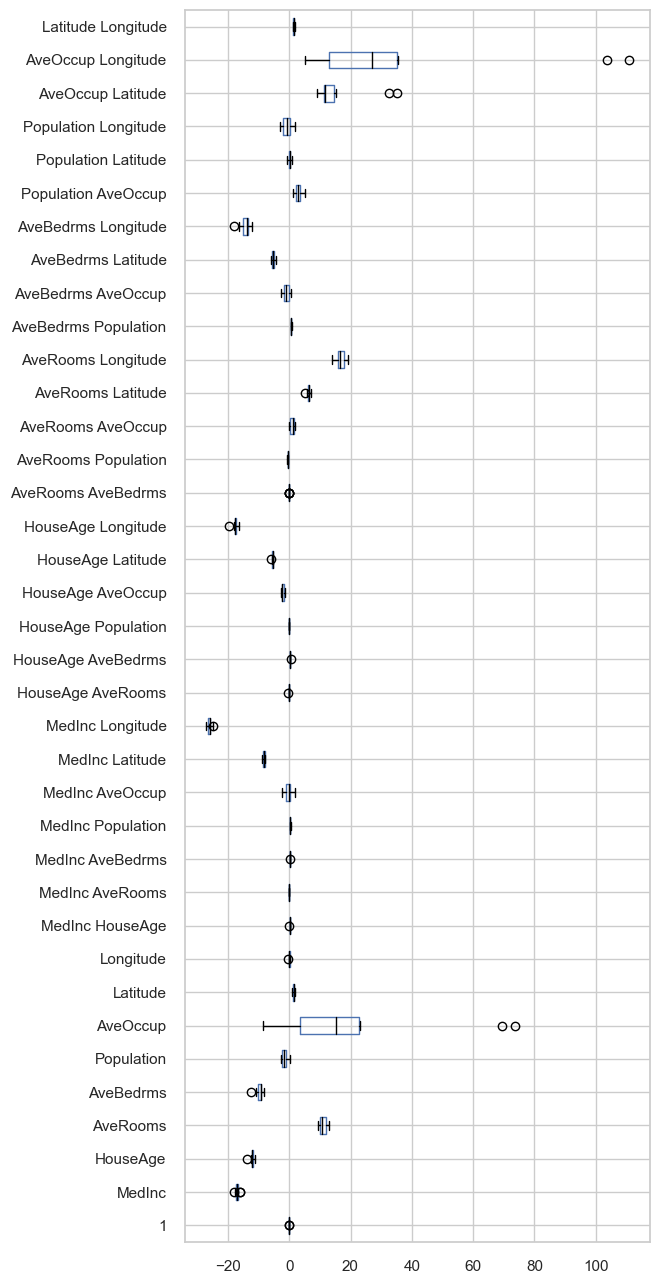

In [44]:
color = {"whiskers":"black", "medians":"black", "caps":"black"}
weights_poly_reg.plot.box(color=color, vert=False, figsize=(6, 16))
plt.show()

In [50]:
feature_names = ridge_reg_cv_results["estimator"][0][0].get_feature_names_out(input_features=X_train.columns)
print(feature_names)

coefs = [est[-1].coef_ for est in ridge_reg_cv_results["estimator"]]
weights_poly_reg = pd.DataFrame(coefs, columns=feature_names)
print(f"\nShape: {weights_poly_reg.shape}")
weights_poly_reg.head(2)

['1' 'MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedInc^2' 'MedInc HouseAge' 'MedInc AveRooms'
 'MedInc AveBedrms' 'MedInc Population' 'MedInc AveOccup'
 'MedInc Latitude' 'MedInc Longitude' 'HouseAge^2' 'HouseAge AveRooms'
 'HouseAge AveBedrms' 'HouseAge Population' 'HouseAge AveOccup'
 'HouseAge Latitude' 'HouseAge Longitude' 'AveRooms^2'
 'AveRooms AveBedrms' 'AveRooms Population' 'AveRooms AveOccup'
 'AveRooms Latitude' 'AveRooms Longitude' 'AveBedrms^2'
 'AveBedrms Population' 'AveBedrms AveOccup' 'AveBedrms Latitude'
 'AveBedrms Longitude' 'Population^2' 'Population AveOccup'
 'Population Latitude' 'Population Longitude' 'AveOccup^2'
 'AveOccup Latitude' 'AveOccup Longitude' 'Latitude^2'
 'Latitude Longitude' 'Longitude^2']

Shape: (10, 45)


,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,MedInc HouseAge,MedInc AveRooms,MedInc AveBedrms,MedInc Population,MedInc AveOccup,MedInc Latitude,MedInc Longitude,HouseAge^2,HouseAge AveRooms,HouseAge AveBedrms,HouseAge Population,HouseAge AveOccup,HouseAge Latitude,HouseAge Longitude,AveRooms^2,AveRooms AveBedrms,AveRooms Population,AveRooms AveOccup,AveRooms Latitude,AveRooms Longitude,AveBedrms^2,AveBedrms Population,AveBedrms AveOccup,AveBedrms Latitude,AveBedrms Longitude,Population^2,Population AveOccup,Population Latitude,Population Longitude,AveOccup^2,AveOccup Latitude,AveOccup Longitude,Latitude^2,Latitude Longitude,Longitude^2
0,0.0,-2.282177,-2.679672,-0.585910,1.390398,-0.257869,-2.506665,0.345145,-1.902854,-0.553664,0.300440,0.538583,-0.346367,0.367585,0.923036,-2.572578,-5.778258,0.195608,-0.307168,0.361486,0.084118,-1.155352,-1.409033,-3.815723,1.351410,-1.929656,-0.454316,0.312775,1.599760,1.286319,0.588750,0.719890,0.187692,-0.932403,0.268875,0.026779,2.248635,0.625369,1.135254,-0.098916,1.938302,1.892136,2.093543,3.824886,-0.407648
1,0.0,-2.293566,-2.361178,-0.343699,1.435252,-0.438712,-2.701277,-0.017227,-1.928517,-0.540886,0.287699,0.577980,-0.361908,0.366097,-0.492589,-2.455552,-5.777729,0.181546,-0.261261,0.328586,0.082022,-1.292549,-1.456358,-3.634040,1.117252,-1.375840,-0.455726,0.370715,1.351793,1.345287,0.262472,0.764727,-0.199373,-0.598162,0.545170,0.009116,1.643483,0.769011,1.183330,0.233850,4.657270,2.196008,2.161747,3.578725,-0.460315


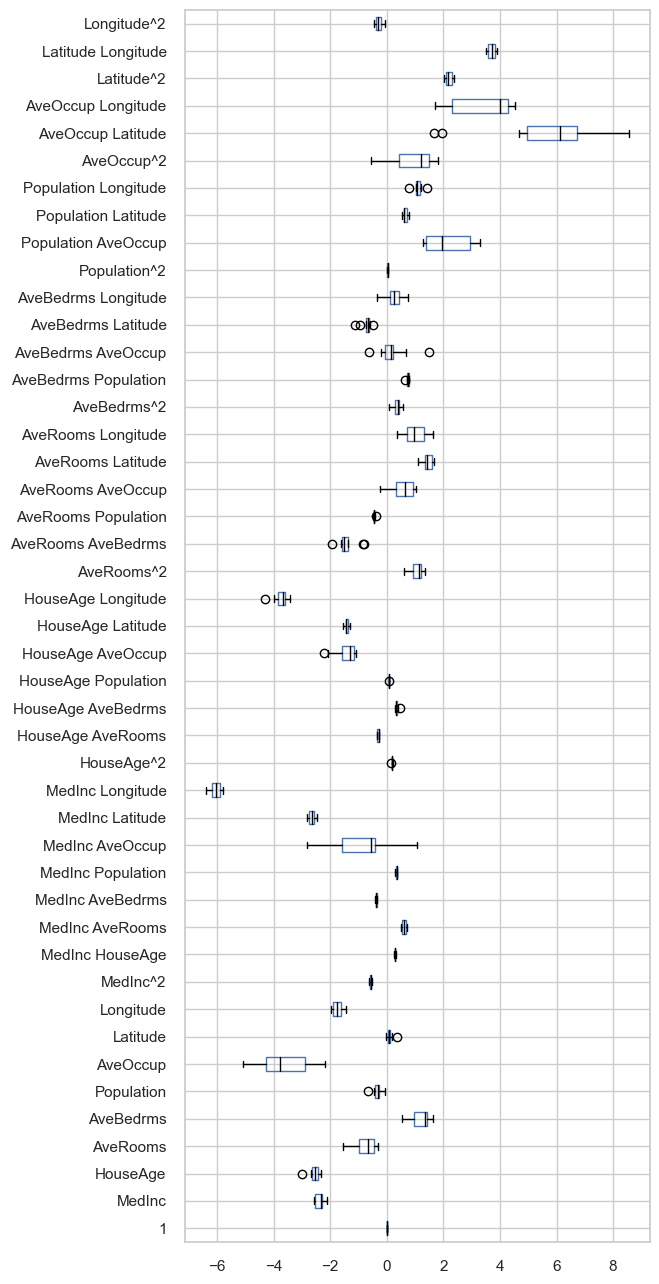

In [51]:
color = {"whiskers":"black", "medians":"black", "caps":"black"}
weights_poly_reg.plot.box(color=color, vert=False, figsize=(6, 16))
plt.show()

## Performance on test set

### Baseline

In [77]:
baseline_model = DummyRegressor(strategy="median")
baseline_model.fit(X_train_com, y_train_com)
y_pred = baseline_model.predict(X_test)
print(f"Mean absolute % error: {mean_absolute_percentage_error(y_test, y_pred)}")

Mean absolute % error: 0.5329666796008011


### Linear reg with normal eq

In [79]:
y_pred = lin_reg_cv_results["estimator"][0].predict(X_test)
print(f"Mean absolute % error: {mean_absolute_percentage_error(y_test, y_pred)}")

Mean absolute % error: 0.3197837164612378


### Linear reg with SGD

In [80]:
y_pred = sgd_reg_cv_results["estimator"][0].predict(X_test)
print(f"Mean absolute % error: {mean_absolute_percentage_error(y_test, y_pred)}")

Mean absolute % error: 0.298174831003673


### Poly reg with Linear

In [81]:
y_pred = poly_reg_cv_results["estimator"][0].predict(X_test)
print(f"Mean absolute % error: {mean_absolute_percentage_error(y_test, y_pred)}")

Mean absolute % error: 0.2834129629962869


### Poly reg with SGD

In [83]:
y_pred = poly_reg_random_search.best_estimator_.predict(X_test)
print(f"Mean absolute % error: {mean_absolute_percentage_error(y_test, y_pred)}")

Mean absolute % error: 0.357384858171408


### Ridge reg

In [84]:
y_pred = ridge_reg_grid_search.best_estimator_.predict(X_test)
print(f"Mean absolute % error: {mean_absolute_percentage_error(y_test, y_pred)}")

Mean absolute % error: 0.27110336451513223


# 

# Assignment: Week 3

## Get the Data

### Load Data

In [9]:
data = fetch_california_housing()

d = np.c_[data.data, data.target]
columns = np.append(data.feature_names, data.target_names)
df = pd.DataFrame(d, columns=columns)

# OR : df = fetch_california_housing(as_frame=True).frame

print(f"Data Shape: {df.shape}")

Data Shape: (20640, 9)


In [10]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
data.target_names

['MedHouseVal']

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [24]:
df.isnull().sum(axis = 0) # axis 0 means column sum

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### [Hint: use appropriate API with random_state=0, shuffle=False and test_size=0.2]

In [69]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)
print(f"Shape:  X_train,     X_test,   y_train,   y_test\n\t{X_train.shape}  {X_test.shape}  {y_train.shape}  {y_test.shape}")

Shape:  X_train,     X_test,   y_train,   y_test
	(16512, 8)  (4128, 8)  (16512,)  (4128,)


## Q.1] 

In [21]:
# If we use StandardScaler for preprocessing and LinearRegression for fitting the model with training set obtained from following code snippet:
# X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, shuffle=False, random_state=0)
# Assume that (X,y) is the california housing dataset.
# What is the R squared value for predictions obtained using test set features?

# Note: Use methods and objects with default parameters

In [33]:
pipeline = Pipeline([("std_scaler", StandardScaler()),("lin_reg", LinearRegression())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [34]:
print(f"Score: {pipeline.score(X_test, y_test)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Score: 0.6605140591531993
R2 Score: 0.6605140591531993


## Q.2] 

In [36]:
# If we use StandardScaler for preprocessing and LinearRegression for fitting the model, what is 
# the root mean squared error value for predictions obtained using test set features?

# Note: Use methods and objects with default parameters

In [37]:
pipeline = Pipeline([("std_scaler", StandardScaler()),("lin_reg", LinearRegression())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [40]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE: 0.7033383507521876


## Q.3]-Q.8] 

In [71]:
# Split the data into training and test sets with random_state=0, shuffle=False and test_size=0.2 parameters.
# Let, y_test= target label in test set of california housing dataset
# and y_pred=target labels obtained by the model using X_test
# Then compute values of the following evaluation metrics

In [72]:
pipeline = Pipeline([("std_scaler", StandardScaler()),("lin_reg", LinearRegression())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [73]:
print(f"explained_variance_score: {explained_variance_score(y_test, y_pred)}")

explained_variance_score: 0.6605500501742703


In [74]:
print(f"Max error: {max_error(y_test, y_pred)}")

Max error: 7.260453292958356


In [75]:
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")

Mean absolute error: 0.5168526993787042


In [76]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 0.4946848356388074


## SGD regression

In [59]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)
print(f"Shape:  X_train,     X_test,   y_train,   y_test\n\t{X_train.shape}  {X_test.shape}  {y_train.shape}  {y_test.shape}")

Shape:  X_train,     X_test,   y_train,   y_test
	(16512, 8)  (4128, 8)  (16512,)  (4128,)


In [66]:
pipeline = Pipeline([("std_scaler", StandardScaler()),("sgd_reg", SGDRegressor())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [67]:
pipeline['sgd_reg'].coef_

array([ 0.80670815, -0.11636868, -0.39588967,  0.33424719, -0.24244277,
       -0.64585749, -1.03684893, -0.95435315])

In [68]:
pipeline['sgd_reg'].intercept_

array([2.01906857])

# Assignment: week 4

## Get the Data

### Load Data

In [3]:
data = fetch_california_housing()

d = np.c_[data.data, data.target]
columns = np.append(data.feature_names, data.target_names)
df = pd.DataFrame(d, columns=columns)

# df = fetch_california_housing(as_frame=True).frame
print(f"Data Shape: {df.shape}")

Data Shape: (20640, 9)


In [4]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
data.target_names

['MedHouseVal']

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.isnull().sum(axis = 0) # axis 0 means column sum

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### [Hint: use appropriate API with random_state=0, shuffle=False and test_size=0.2]

In [31]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)
print(f"Shape:  X_train,     X_test,   y_train,   y_test\n\t{X_train.shape}  {X_test.shape}  {y_train.shape}  {y_test.shape}")

Shape:  X_train,     X_test,   y_train,   y_test
	(16512, 8)  (4128, 8)  (16512,)  (4128,)


## Q.1] 

In [12]:
# Write a function k_fold_cv(X) to run 2-fold cross validation repeated 2 times for the array X = [[1, 2], [3, 4], [1, 2], [3, 4]] 
# which will return a concatenated array combining the training and testing dataset. 
# Set random_state=1 in your code. Which of the following options denote the concatenated array?

In [27]:
k_fold_cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])

In [28]:
k_fold_cv.split(X)

<generator object _RepeatedSplits.split at 0x0000013264516040>

In [30]:
for train_index, test_index in k_fold_cv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     print(X_train, X_test)

TRAIN: [0 1] TEST: [2 3]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


## Q.2] Q.3] Q.4]

In [24]:
#df = fetch_california_housing(as_frame=True).frame
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
print(f"Shape:  X_train,     X_test,   y_train,   y_test\n\t{X_train.shape}  {X_test.shape}  {y_train.shape}  {y_test.shape}")

Shape:  X_train,     X_test,   y_train,   y_test
	(14448, 8)  (6192, 8)  (14448,)  (6192,)


In [50]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [51]:
sgd_reg = SGDRegressor(random_state=1)

In [52]:
param_grid = {"loss":["squared_error", "huber"],
             "penalty":["l1", "l2"],
             "alpha":[0.1, 0.01, 0.001],
             "max_iter":[1000,2000,5000]}

reg = GridSearchCV( sgd_reg, param_grid=param_grid, cv=4, verbose=0)

In [54]:
reg.fit(X_train_norm, y_train)

GridSearchCV(cv=4, estimator=SGDRegressor(random_state=1),
             param_grid={'alpha': [0.1, 0.01, 0.001],
                         'loss': ['squared_error', 'huber'],
                         'max_iter': [1000, 2000, 5000],
                         'penalty': ['l1', 'l2']})

In [55]:
reg.best_params_

{'alpha': 0.001, 'loss': 'huber', 'max_iter': 1000, 'penalty': 'l1'}

In [56]:
reg.best_score_

0.42591957367305

In [59]:
reg.score(X_test_norm, y_test)

0.37044155130235423

## Q.5] Q.6]

In [60]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
print(f"Shape:  X_train,     X_test,   y_train,   y_test\n\t{X_train.shape}  {X_test.shape}  {y_train.shape}  {y_test.shape}")

Shape:  X_train,     X_test,   y_train,   y_test
	(14448, 8)  (6192, 8)  (14448,)  (6192,)


In [61]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [64]:
ridge_reg = Ridge(random_state=1)

In [65]:
param_grid = {"fit_intercept":[True, False],
             "alpha":[0.5,0.1,0.05,0.01,0.005,0.001]}

reg = GridSearchCV( ridge_reg, param_grid=param_grid, cv=4, verbose=0)

In [66]:
reg.fit(X_train_norm, y_train)

GridSearchCV(cv=4, estimator=Ridge(random_state=1),
             param_grid={'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'fit_intercept': [True, False]})

In [67]:
reg.best_params_

{'alpha': 0.5, 'fit_intercept': True}

In [68]:
reg.best_score_

0.4512969715984393

In [69]:
reg.score(X_test_norm, y_test)

0.581129747333749

## Q.7] Q.8]

In [120]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False, random_state=1)
print(f"Shape:  X_train,     X_test,   y_train,   y_test\n\t{X_train.shape}  {X_test.shape}  {y_train.shape}  {y_test.shape}")

Shape:  X_train,     X_test,   y_train,   y_test
	(12384, 8)  (8256, 8)  (12384,)  (8256,)


In [104]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# y_train_norm = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
# y_test_norm = scaler.transform(np.array(y_test).reshape(-1, 1))

In [105]:
lasso_reg = Lasso(random_state=1)

In [121]:
pipeline = Pipeline([('scaler', StandardScaler(with_mean=True, with_std=True)),
                    ('lasso', Lasso(random_state=1))])

In [122]:
param_grid = {"lasso__fit_intercept":[True, False],
             "lasso__alpha":[0.5,0.1,0.05,0.01,0.005,0.001]}

reg = GridSearchCV( pipeline, param_grid=param_grid, cv=6, verbose=0)

In [123]:
reg.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=1))]),
             param_grid={'lasso__alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'lasso__fit_intercept': [True, False]})

In [124]:
reg.best_params_

{'lasso__alpha': 0.1, 'lasso__fit_intercept': True}

In [109]:
reg.best_score_

0.4718907102355833

In [126]:
reg.score(X_test, y_test)

0.4373619917119429

In [130]:
pipeline = Pipeline([('scaler', StandardScaler(with_mean=True, with_std=True)),
                    ('lasso', Lasso(alpha= 0.01, fit_intercept= True, random_state=1))])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.5786494586892117

In [1]:
x = np.array([1,2,3,4])
print(x)
print(x.shape)
x = x.reshape(2,2)
print(x)
print(x.shape)

NameError: name 'np' is not defined